<a href="https://www.kaggle.com/code/alihassanshahid/water-quality-monitoring-ml-model?scriptVersionId=207107029" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Water Quality Monitoring Using Machine Learning 🚰

## Project Overview
This notebook demonstrates the development of a machine learning model to monitor and predict water quality. The goal is to analyze various physical, chemical, and biological parameters to assess water quality using supervised machine learning techniques.

## Objectives
- Understand and preprocess water quality data.
- Perform exploratory data analysis (EDA) to uncover patterns and trends.
- Build, train, and evaluate a supervised machine learning model for predicting water quality status or parameters.
- Interpret the results and provide actionable insights.

---

**Importance of Water Quality Monitoring**  
Effective water quality monitoring is crucial for environmental protection, human health, and sustainable development. Machine learning techniques offer the potential to automate, improve accuracy, and derive actionable insights from complex datasets.


## Metadata Information 🗂️

| Feature                  | Description |
|--------------------------|-------------|
| Water Speed              | Speed of water flow (e.g., m/s) |
| Water Direction          | Direction of water flow (e.g., compass degrees) |
| Chlorophyll (mg/m³)      | Concentration of chlorophyll in water |
| Temperature (°C)         | Temperature of water |
| Dissolved Oxygen (mg/L)  | Concentration of dissolved oxygen |
| pH                       | pH level indicating water acidity or alkalinity |
| Salinity (ppt)           | Concentration of salt in water |
| Specific Conductance     | Conductivity indicating ionic strength |
| Turbidity (NTU)          | Measurement of water clarity or cloudiness |

---

**Data Source**: [Mention data source if available or applicable]  
**Data Collection Context**: Describe any context relevant to data collection, such as location, time frame, or sensors used.


# 1.1 Intro

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Data manipulation
import pandas as pd
import numpy as np

# Model evaluation
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Machine learning models
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/kaggle/input/water-quality-monitoring-dataset/brisbane_water_quality.csv")

In [3]:
df.head()

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
0,2023-08-04 23:00:00,1468,4.834,73.484,1.621,NaN,20.018,NaN,7.472,NaN,101.175,NaN,8.176,NaN,35.215,NaN,53.262,NaN,2.068,NaN
1,2023-08-04 23:30:00,1469,2.544,106.424,1.959,NaN,19.986,NaN,7.455,NaN,100.884,NaN,8.175,NaN,35.209,NaN,53.254,NaN,1.994,NaN
2,2023-08-04 23:00:00,1470,1.260,156.755,1.620,NaN,20.001,NaN,7.430,NaN,100.571,NaN,8.171,NaN,35.207,NaN,53.252,NaN,2.030,NaN
3,2023-08-04 23:30:00,1471,0.760,281.754,1.761,NaN,19.983,NaN,7.419,NaN,100.398,NaN,8.171,NaN,35.211,NaN,53.257,NaN,1.973,NaN
4,2023-08-04 23:00:00,1472,3.397,244.637,1.635,NaN,19.986,NaN,7.429,NaN,100.538,NaN,8.171,NaN,35.208,NaN,53.253,NaN,1.944,NaN


In [4]:
df.shape

(30894, 20)

# 1.2 Impute Missing Values

In [5]:
# Missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values)

# Handle missing values: fill or drop
df = df.dropna()



Dissolved Oxygen (%Saturation) [quality]    5950
Dissolved Oxygen (%Saturation)              5749
Temperature [quality]                       5344
Temperature                                 5164
Dissolved Oxygen [quality]                  4524
Dissolved Oxygen                            4300
Salinity [quality]                          4182
Salinity                                    3958
Turbidity [quality]                         2224
Turbidity                                   2000
Specific Conductance [quality]              1591
Specific Conductance                        1367
pH [quality]                                1308
pH                                          1084
Chlorophyll [quality]                        808
Chlorophyll                                  585
Average Water Speed                           20
Average Water Direction                        1
dtype: int64


In [6]:
df.isnull().sum()

Timestamp                                   0
Record number                               0
Average Water Speed                         0
Average Water Direction                     0
Chlorophyll                                 0
Chlorophyll [quality]                       0
Temperature                                 0
Temperature [quality]                       0
Dissolved Oxygen                            0
Dissolved Oxygen [quality]                  0
Dissolved Oxygen (%Saturation)              0
Dissolved Oxygen (%Saturation) [quality]    0
pH                                          0
pH [quality]                                0
Salinity                                    0
Salinity [quality]                          0
Specific Conductance                        0
Specific Conductance [quality]              0
Turbidity                                   0
Turbidity [quality]                         0
dtype: int64

# 1.3 Removing Outliers

In [7]:
from scipy import stats

# Z-scores for detecting outliers
z_scores = stats.zscore(df.select_dtypes(include='number'))

# Threshold for outliers (you can set it to 3 standard deviations)
outliers = (z_scores > 3).sum(axis=1)
outlier_rows = df[outliers > 0]
print(outlier_rows)

# You can visualize outliers using boxplots as well (as shown earlier).


                 Timestamp  Record number  Average Water Speed  \
230    2023-08-09 15:30:00           1698                3.287   
231    2023-08-09 16:00:00           1699                6.118   
251    2023-08-10 02:00:00           1719                2.513   
260    2023-08-10 06:30:00           1728                0.608   
263    2023-08-10 08:00:00           1731                4.691   
...                    ...            ...                  ...   
28692  2024-06-12 04:40:00          30160               58.215   
28990  2024-06-14 06:00:00          30458               56.093   
30103  2024-06-21 22:10:00          31571               70.008   
30713  2024-06-26 03:10:00          32181               67.262   
30718  2024-06-26 04:00:00          32186               72.360   

       Average Water Direction  Chlorophyll  Chlorophyll [quality]  \
230                    229.265        2.848                 1020.0   
231                    146.147        2.744                 1020.0 

# 1.4 Data Visualizations

## 1.4.1 Polar plot for water direction and speed

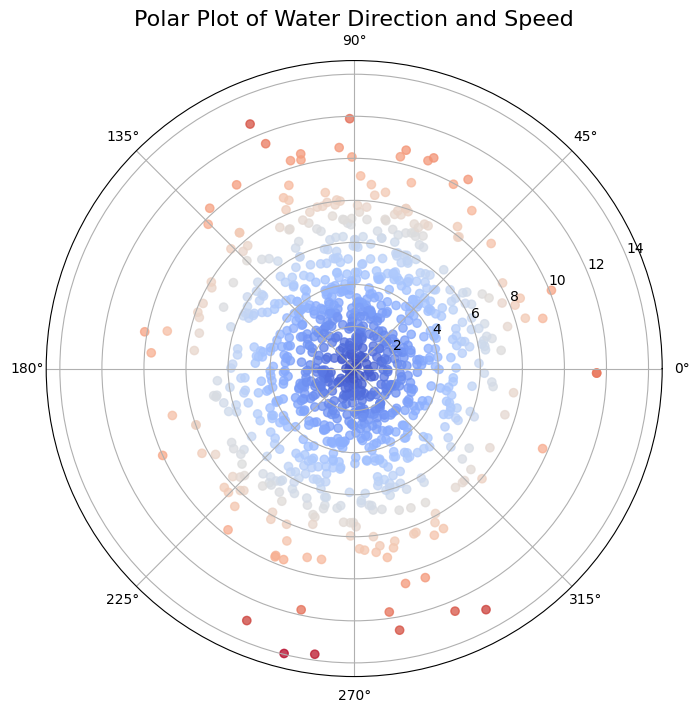

In [8]:
# Polar plot for water direction and speed
df_sample = df.head(1000)  # For readability, use a sample

plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')

# Convert degrees to radians for plotting
angles = np.deg2rad(df_sample['Average Water Direction'])
speeds = df_sample['Average Water Speed']

# Create the polar plot
ax.scatter(angles, speeds, c=speeds, cmap='coolwarm', alpha=0.75)
ax.set_title('Polar Plot of Water Direction and Speed', fontsize=16)
plt.show()


## 1.4.2 Violin plot comparing 'Chlorophyll' values based on quality

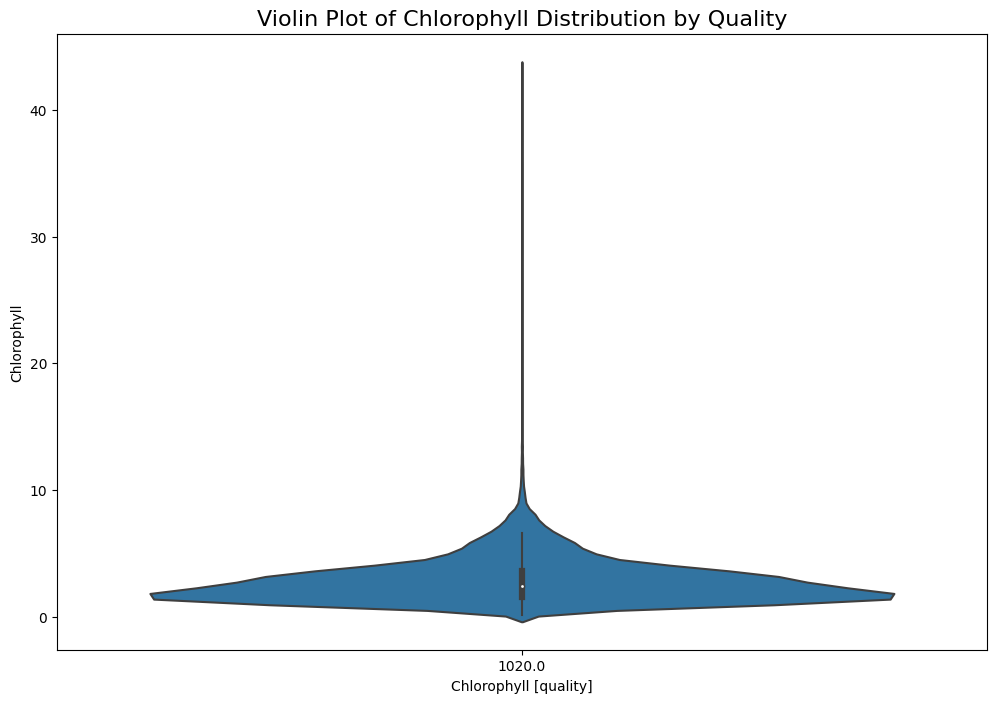

In [9]:
# Violin plot comparing 'Chlorophyll' values based on quality
plt.figure(figsize=(12, 8))
sns.violinplot(x='Chlorophyll [quality]', y='Chlorophyll', data=df, split=True)
plt.title('Violin Plot of Chlorophyll Distribution by Quality', fontsize=16)
plt.show()


## 1.4.3 Network Graph (In Progress)

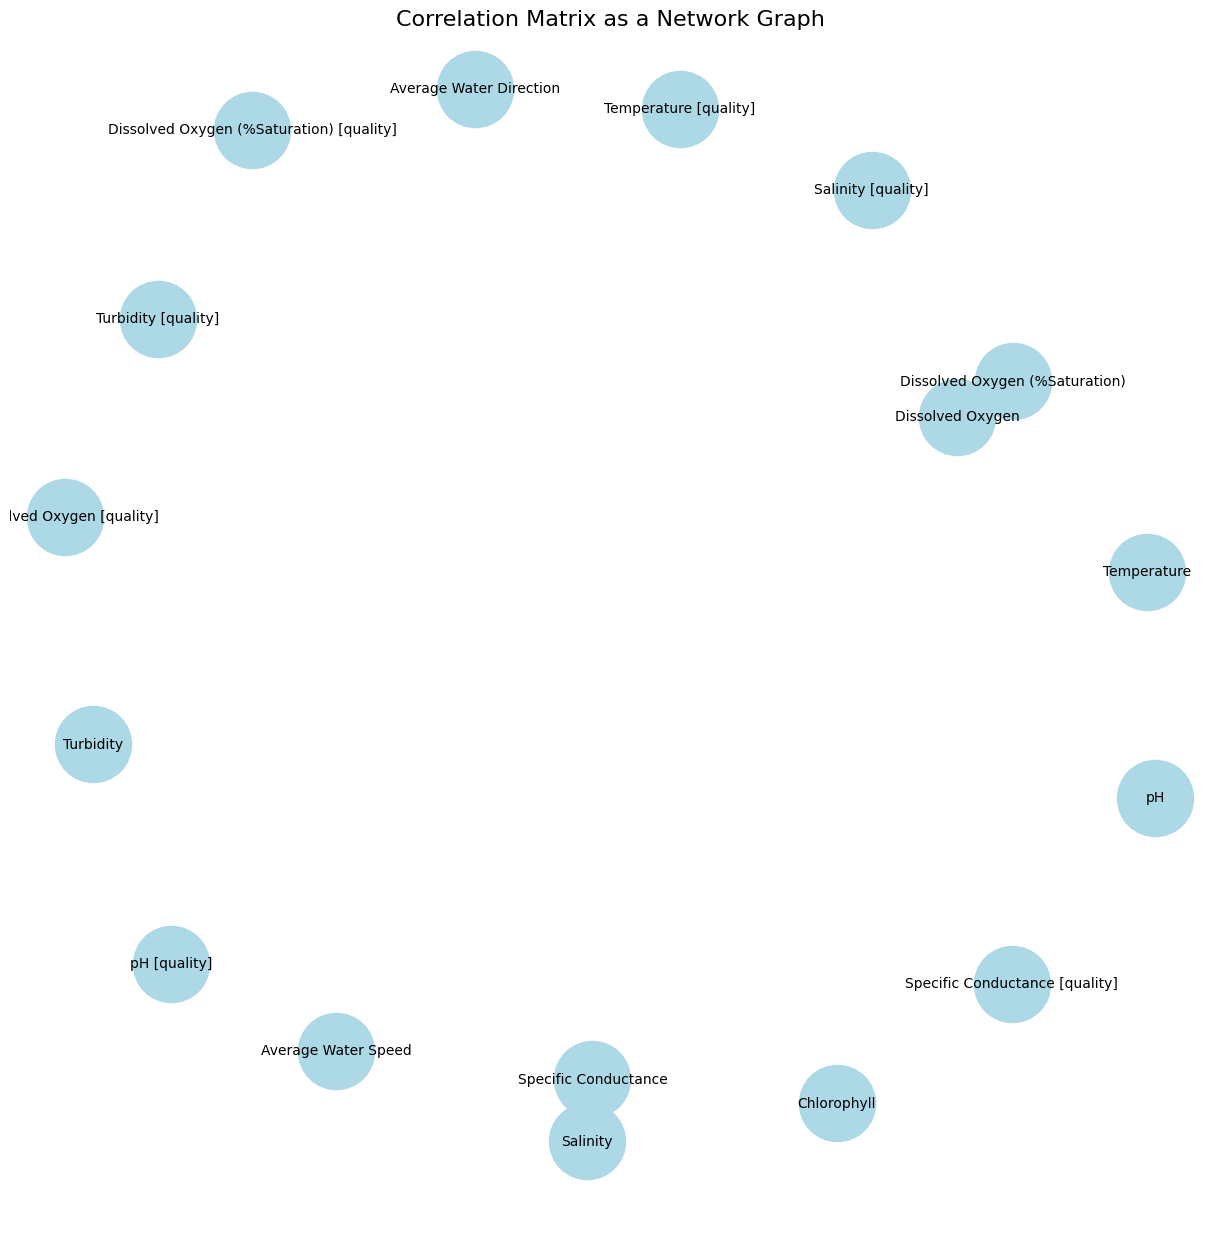

In [10]:
import networkx as nx

# Drop non-numeric columns for correlation calculation
numeric_df = df.drop(columns=['Timestamp', 'Record number', 'Chlorophyll [quality]'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a network graph from the correlation matrix
G = nx.Graph()

# Add nodes
for col in corr_matrix.columns:
    G.add_node(col)

# Add edges (only strong correlations for clarity)
threshold = 0.6
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=corr_matrix.iloc[i, j])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Positions the nodes
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10)
nx.draw_networkx_edges(G, pos, width=[d['weight'] * 5 for (u, v, d) in edges], edge_color='grey')
plt.title('Correlation Matrix as a Network Graph', size=16)
plt.show()


## 1.4.4 Histogram for numeric values

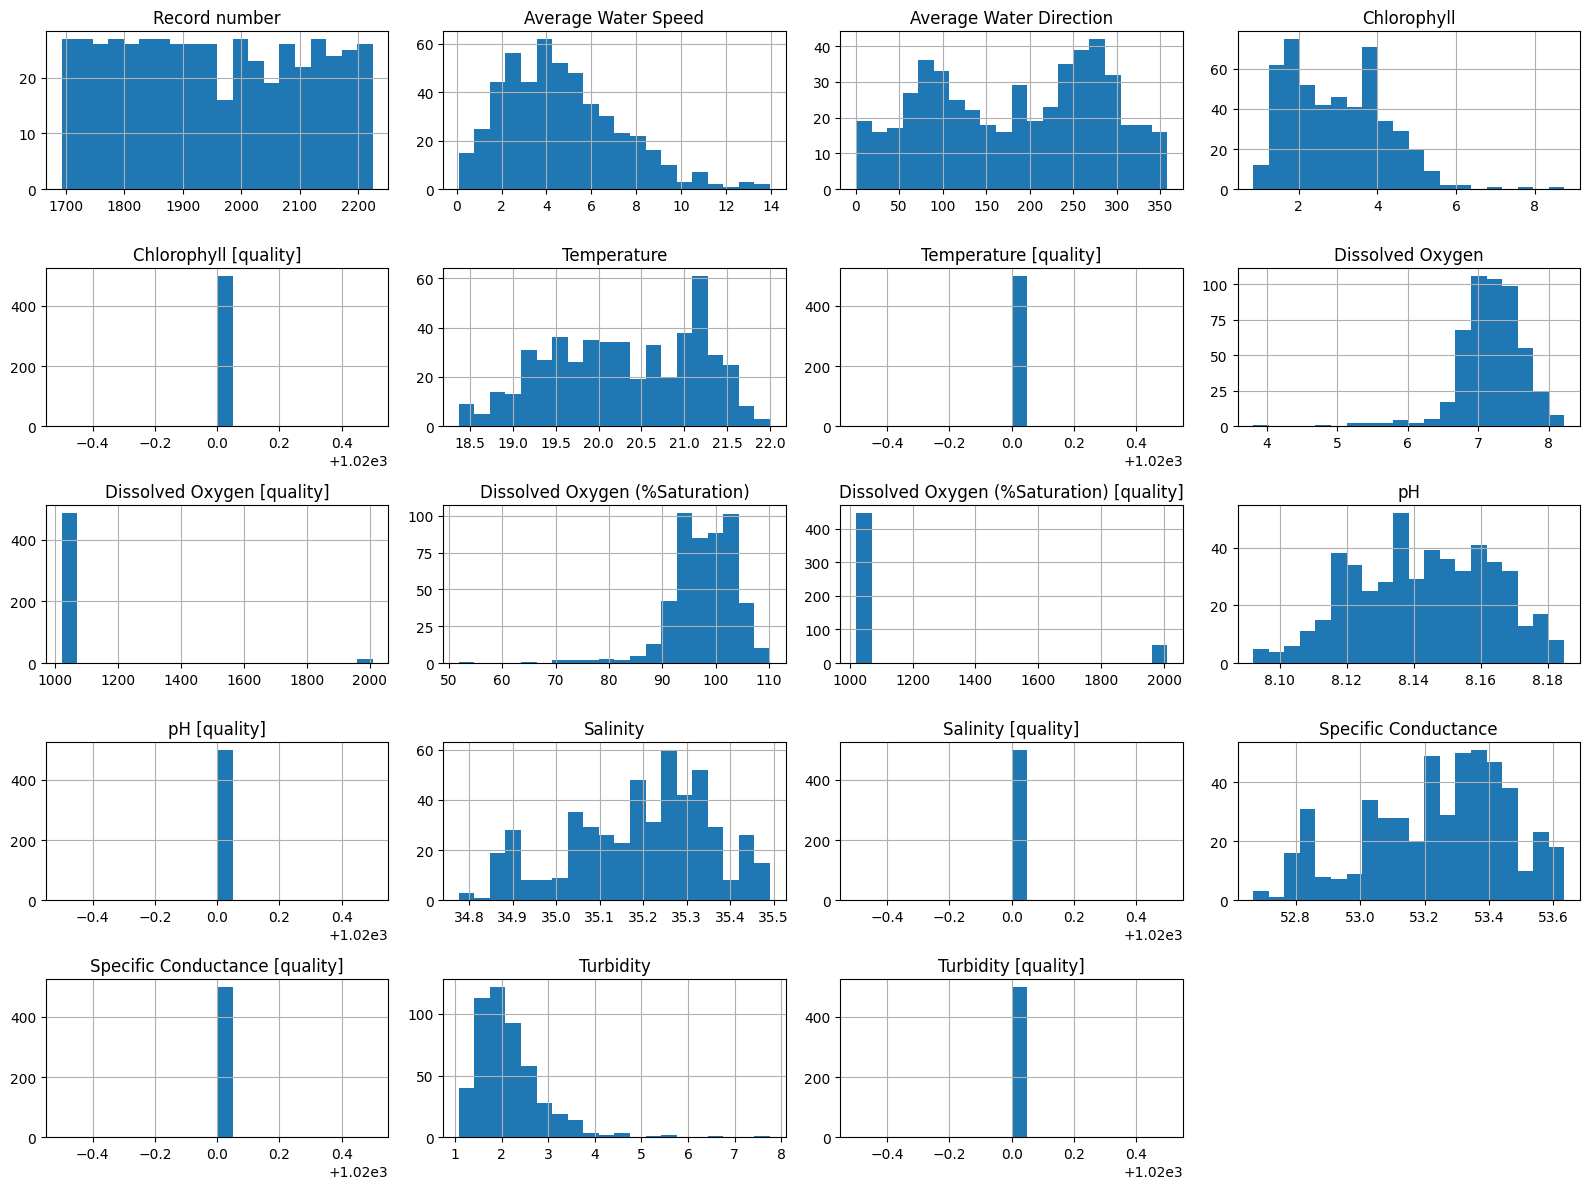

In [11]:
df_sample = df.head(500)
# Plot histograms for each numeric column
df_sample.hist(figsize=(16, 12), bins=20)
plt.tight_layout()
plt.show()


## 1.4.5 Boxplot to visualize outliers (In Progress)

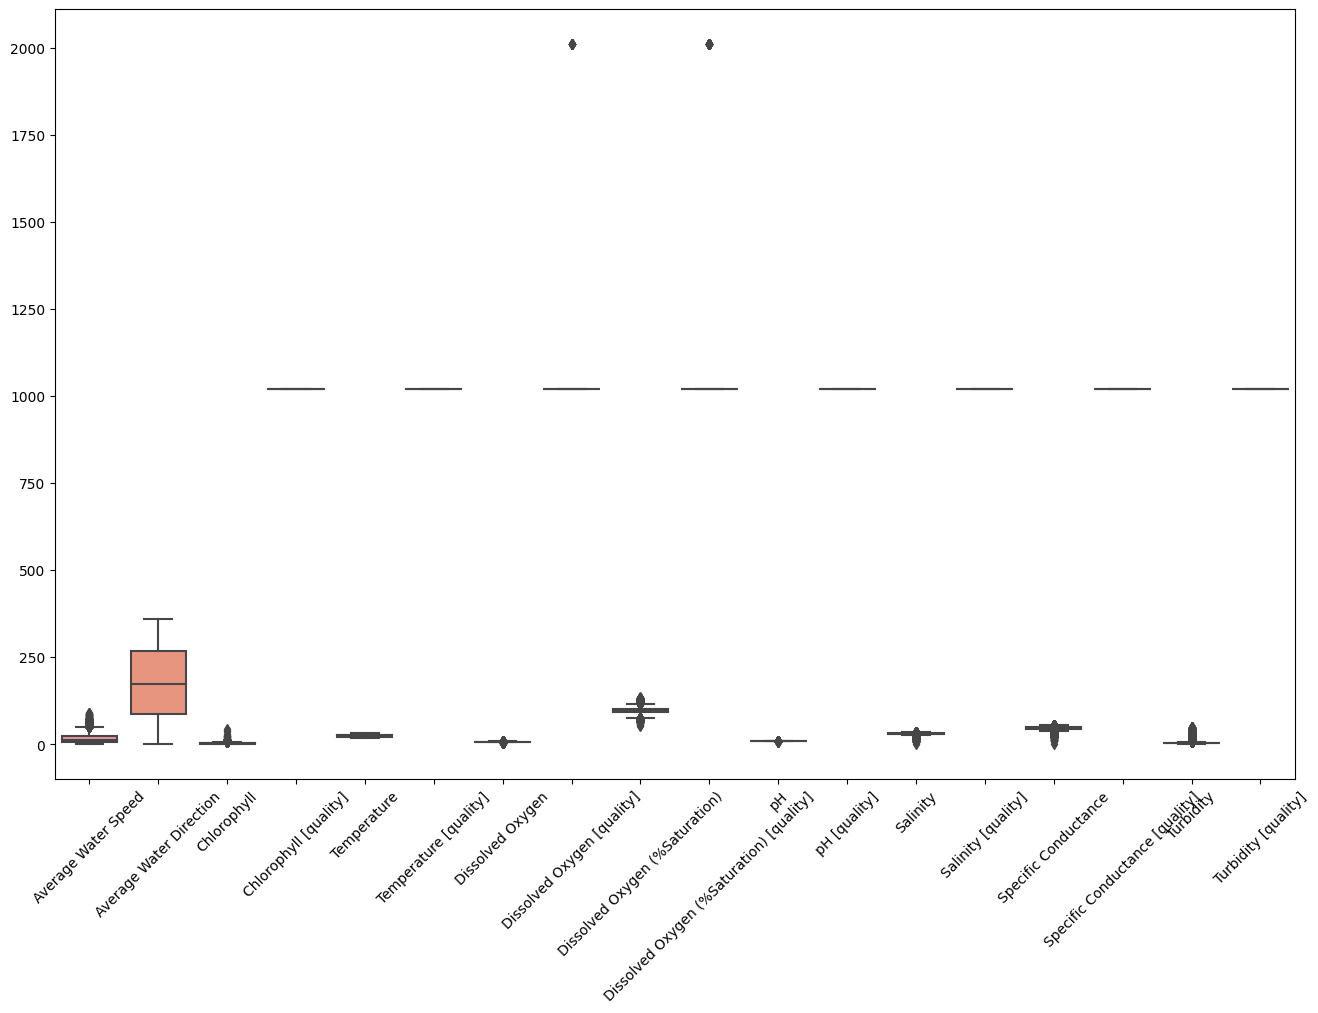

In [12]:
# Boxplot to visualize outliers for each variable
plt.figure(figsize=(16, 10))
sns.boxplot(data=df.drop(columns=['Timestamp', 'Record number']))
plt.xticks(rotation=45)
plt.show()

## 1.4.6 Time Series Analysis 

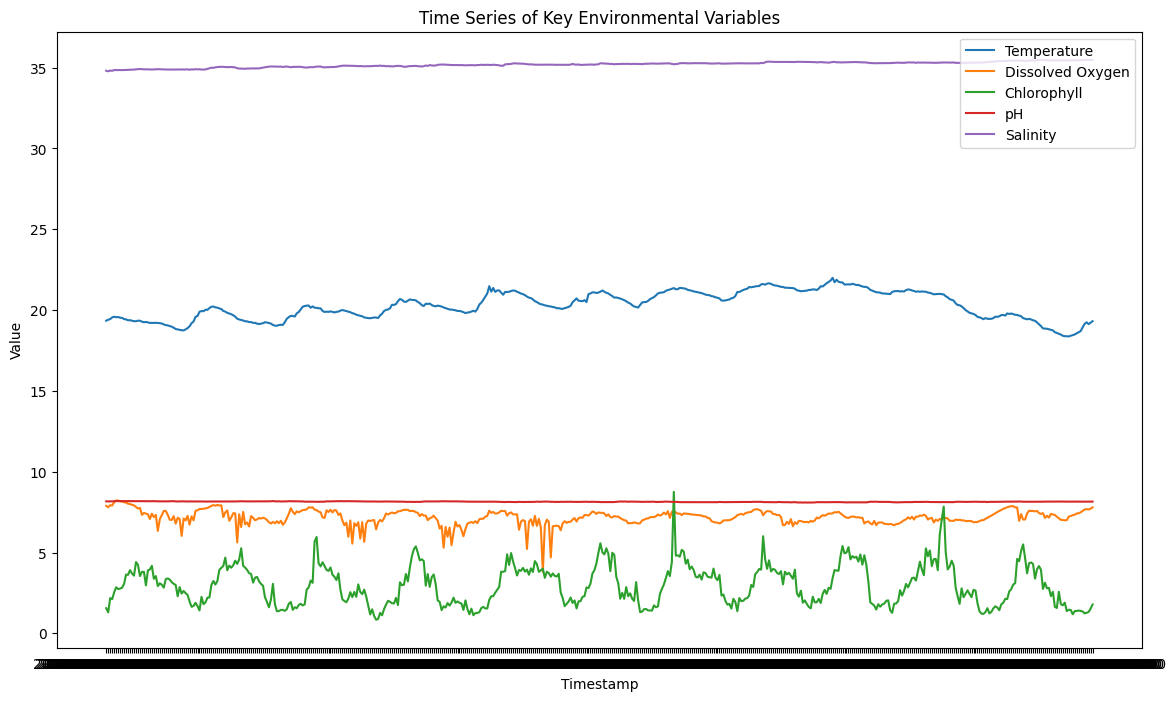

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample dataframe creation for example purposes
# Ensure df has 'Timestamp' and the environmental variables ('Temperature', 'Dissolved Oxygen', etc.)
# df = your dataframe 

# Convert timestamp to datetime if it’s not already
df_sample = df.head(500)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot time-series for key variables
plt.figure(figsize=(14, 8))
for col in ['Temperature', 'Dissolved Oxygen', 'Chlorophyll', 'pH', 'Salinity']:
    plt.plot(df_sample['Timestamp'], df_sample[col], label=col)

plt.legend()
plt.title('Time Series of Key Environmental Variables')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()



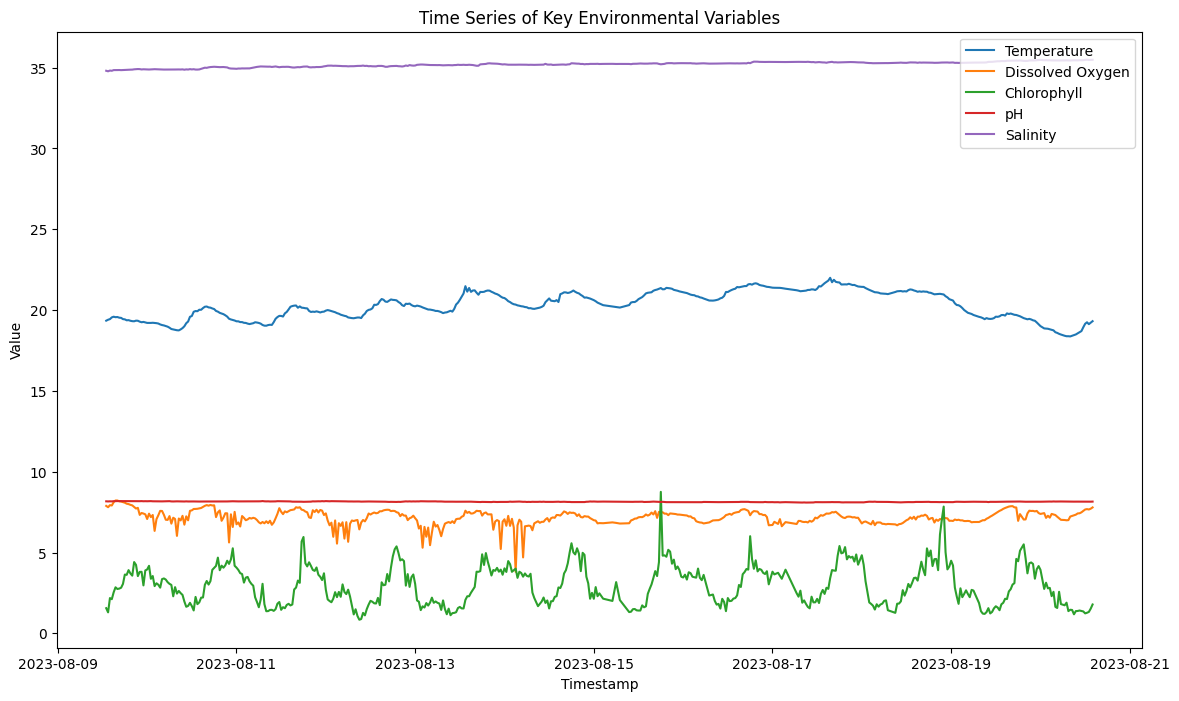

In [14]:
# Convert timestamp to datetime if it’s not already
df_sample = df.head(500)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot time-series for key variables
plt.figure(figsize=(14, 8))
for col in ['Temperature', 'Dissolved Oxygen', 'Chlorophyll', 'pH', 'Salinity']:
    plt.plot(df_sample['Timestamp'], df_sample[col], label=col)

plt.legend()
plt.title('Time Series of Key Environmental Variables')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()


## 1.4.7 3D plot: Temperature vs Salinity vs Time

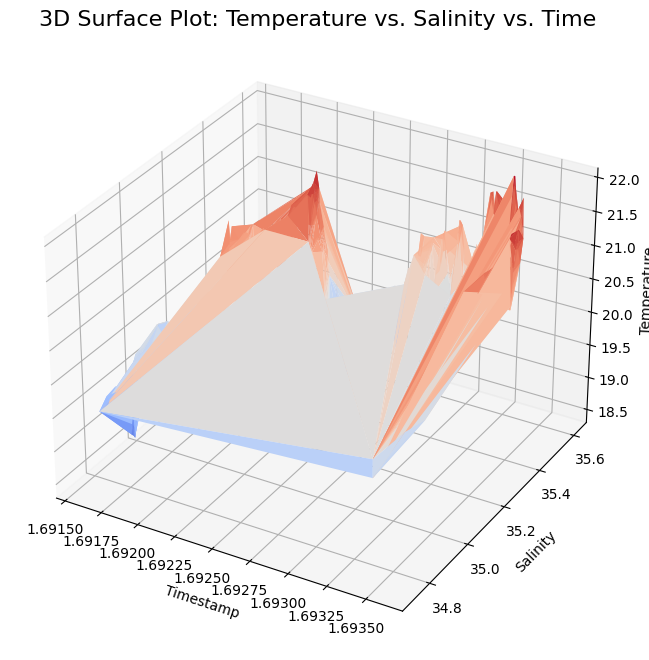

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare the data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the first 1000 rows to prevent clutter
df_sample = df.head(1000)

# Convert Timestamp to a numerical value (e.g., seconds since epoch)
df_sample['Timestamp'] = pd.to_datetime(df_sample['Timestamp']).astype(int) / 10**9

# Drop duplicates if necessary
df_sample = df_sample.drop_duplicates(subset=['Timestamp', 'Salinity', 'Temperature'])

# Create a 3D plot
ax.plot_trisurf(df_sample['Timestamp'], df_sample['Salinity'], df_sample['Temperature'], cmap='coolwarm', linewidth=0.2)

ax.set_title('3D Surface Plot: Temperature vs. Salinity vs. Time', fontsize=16)
ax.set_xlabel('Timestamp')
ax.set_ylabel('Salinity')
ax.set_zlabel('Temperature')
plt.show()


# 1.5 Supervised ML implementation

In [16]:
df.shape

(19149, 20)

In [17]:
# Drop columns with quality information
df = df.drop(columns=['Dissolved Oxygen [quality]', 'Chlorophyll [quality]', 'Temperature [quality]', 
                      'Dissolved Oxygen (%Saturation) [quality]', 'pH [quality]', 'Salinity [quality]',
                      'Specific Conductance [quality]', 'Turbidity [quality]'], errors='ignore')

In [18]:
df.head()

,Timestamp,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
225,2023-08-09 13:00:00,1693,5.314,50.605,1.557,19.346,7.885,105.210,8.169,34.809,52.714,2.085
226,2023-08-09 13:30:00,1694,5.088,34.550,1.299,19.404,7.804,104.222,8.162,34.776,52.668,2.296
227,2023-08-09 14:00:00,1695,5.836,154.556,2.182,19.443,7.930,106.005,8.169,34.822,52.730,2.081
228,2023-08-09 14:30:00,1696,1.530,17.843,2.112,19.549,7.912,105.963,8.165,34.808,52.712,2.291
229,2023-08-09 15:00:00,1697,6.343,78.149,2.539,19.591,8.113,108.773,8.178,34.850,52.769,2.014


In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define target and features
y = df['Dissolved Oxygen']
X = df[['Average Water Speed', 'Average Water Direction', 'Chlorophyll', 'Temperature', 
          'Salinity', 'Specific Conductance', 'Turbidity']]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.1314
